In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

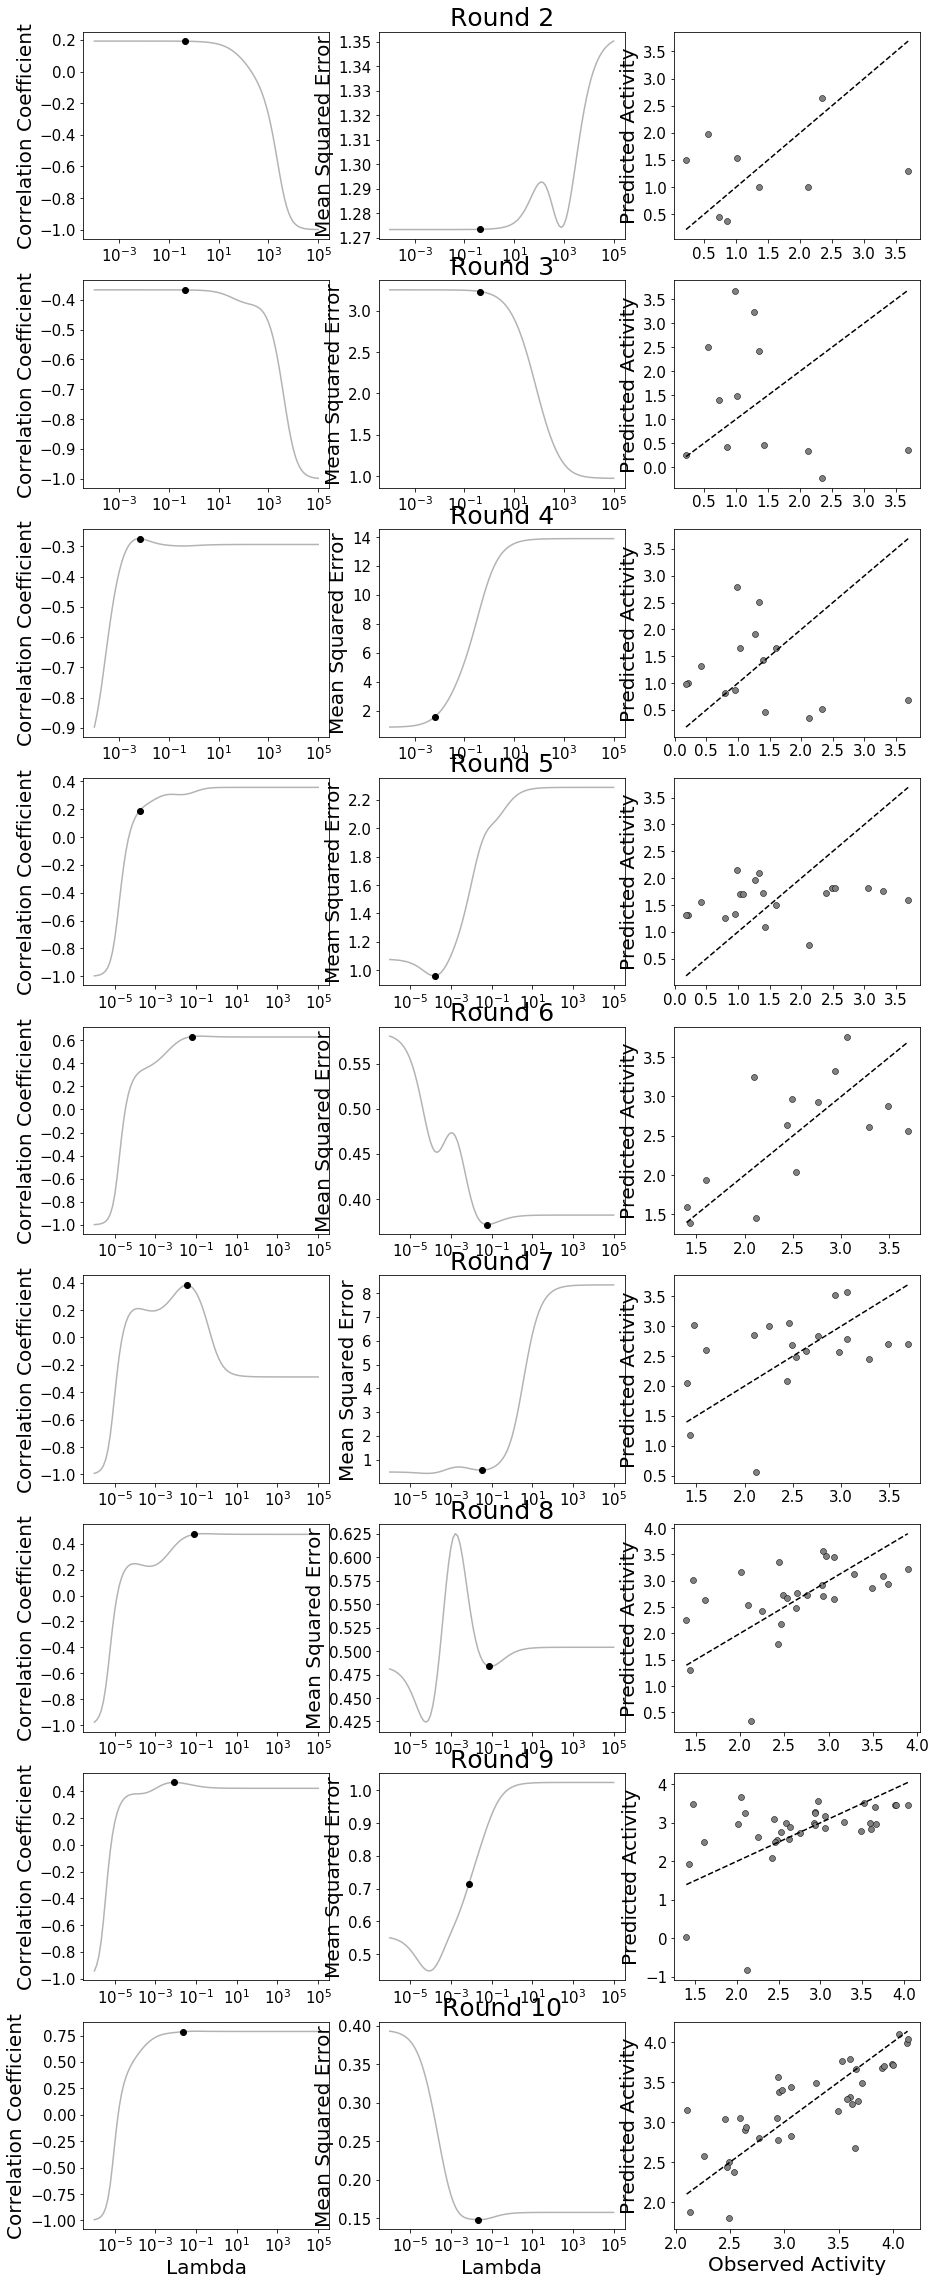

In [2]:
#Build the figure with MSE instead of SSE (divide the SSE by the number of points in the sample, or the length of Yact). Loop through the data files and load each round individually

plt.figure(figsize=(15,45))

nrows=10
ncols=3

for i in range(2,11):

    #Load the data from the given round
    lam_array,cc_array,err2_array,lam,cc,err2,Yact,Y_hat_cv=pickle.load(open('r'+str(i)+'_regularization_and_xval_data.p','rb'))
    
    #Make the plots
    #Lambda scan (CC)
    plt.subplot(nrows,ncols,ncols*i-ncols-2)
    plt.semilogx(lam_array,cc_array,'-',color='0.7',label='CC')
    plt.semilogx(lam,cc,'o',label='Selected Lambda (CC)',color='k')
    plt.ylabel('Correlation Coefficient',size=20)
    plt.yticks(size=15)
    plt.xticks(size=15)

    #plt.xlabel('Lambda')
    
    if i>=4:
        left,right=plt.xlim()
        #plt.xlim((-.0025,.1))
        
    if i==10:
        plt.xlabel('Lambda',size=20)
    
    #Lambda scan (Squared error)
    plt.subplot(nrows,ncols,ncols*i-ncols-1)
    plt.title('Round ' + str(i),size=25)

    plt.semilogx(lam_array,np.array(err2_array)/len(Yact[:,0]),'-',color='0.7',label='Squared Error')
    plt.semilogx(lam,err2/len(Yact[:,0]),'o',label='Selected Lambda (Squared Error)',color='k')
    plt.ylabel('Mean Squared Error',size=20)
    plt.yticks(size=15)
    plt.xticks(size=15)

    #plt.xlabel('Lambda')

    
    if i>=4:
        left,right=plt.xlim()
        #plt.xlim((-.0025,.1))
        
    if i==10:
        plt.xlabel('Lambda',size=20)
    
    #LOOCV
    plt.subplot(nrows,ncols,ncols*i-ncols)
    sns.scatterplot(Yact[:,0],Y_hat_cv[:,0],marker='o',color='0.5',edgecolor='k',linewidth=0.5)
    plt.plot([np.min(Yact),np.max(Yact)],[np.min(Yact),np.max(Yact)],'k--')
    #plt.xlabel('Observed Activity')
    plt.ylabel('Predicted Activity',size=20)
    plt.yticks(size=15)
    plt.xticks(size=15)

    
    if i==10:
        plt.xlabel('Observed Activity',size=20)
    
    